In [54]:
from plotly import (express as px, graph_objects as go)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
metrics_df = pd.read_csv('./Report/results/datasets/data.csv')
results_df = pd.read_csv('./Report/results/datasets/results.csv')

Text(0, 0.5, 'Função Objetivo')

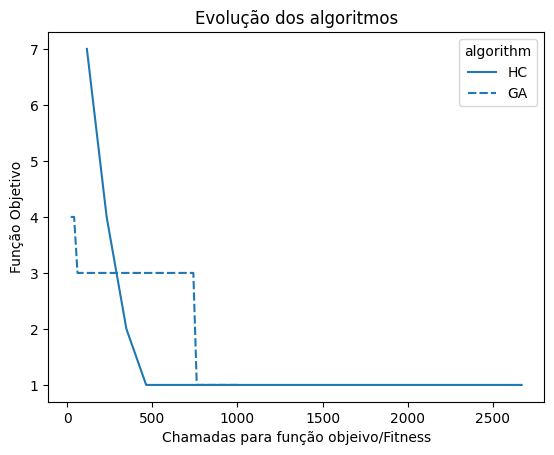

In [60]:
sns.lineplot(x='call', y='evaluation',
             data=metrics_df[metrics_df['algorithm'] != 'SA'], style='algorithm')
plt.title('Evolução dos algoritmos')
plt.xlabel('Chamadas para função objeivo/Fitness')
plt.ylabel('Função Objetivo')
# plt.savefig('./Report/results/plots/evol.png')

In [62]:
results_df

,exec,algorithm,evaluation
0,1,HC,1
1,1,SA,8
2,1,GA,3
3,2,HC,2
4,2,SA,10
...,...,...,...
85,29,SA,6
86,29,GA,2
87,30,HC,1
88,30,SA,13


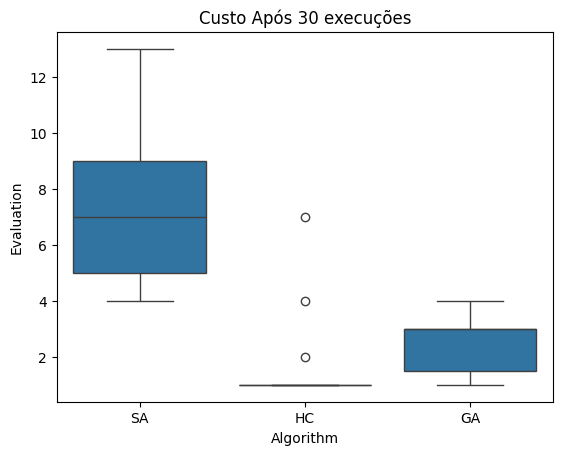

In [64]:
sns.boxplot(x='algorithm', y='evaluation', data=metrics_df)
plt.title('Custo Após 30 execuções')
plt.xlabel('Algorithm')
plt.ylabel('Evaluation')
plt.savefig('./Report/results/plots/cost.png')

In [58]:
table = results_df.groupby(by='algorithm', as_index=False).describe()
table = (table
         .set_index(table['algorithm'])
         .drop(['exec', 'algorithm'], axis='columns', level=0)
         .drop(['count', '25%',	'50%', '75%'], axis='columns', level=1)
         ['evaluation'].reset_index()
         )
table.to_latex('./Report/results/plots/table1.tex',
               index=False, caption="Estátistica das execuções dos algoritmos",
               sparsify=True,
               float_format="%.3f", encoding='utf8')